In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "z"
quantile = "0"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

11it [00:00, 105.79it/s]

26it [00:00, 115.62it/s]

41it [00:00, 123.88it/s]

57it [00:00, 130.92it/s]

72it [00:00, 136.11it/s]

87it [00:00, 138.88it/s]

103it [00:00, 143.45it/s]

119it [00:00, 147.39it/s]

134it [00:00, 146.19it/s]

150it [00:01, 149.21it/s]

165it [00:01, 149.03it/s]

181it [00:01, 151.63it/s]

197it [00:01, 153.37it/s]

213it [00:01, 154.56it/s]

229it [00:01, 153.82it/s]

245it [00:01, 151.39it/s]

261it [00:01, 153.16it/s]

277it [00:01, 153.12it/s]

293it [00:01, 152.16it/s]

309it [00:02, 116.02it/s]

325it [00:02, 125.41it/s]

341it [00:02, 133.11it/s]

357it [00:02, 139.98it/s]

373it [00:02, 144.18it/s]

389it [00:02, 147.38it/s]

405it [00:02, 148.95it/s]

421it [00:02, 148.66it/s]

437it [00:03, 149.71it/s]

453it [00:03, 151.40it/s]

469it [00:03, 148.78it/s]

485it [00:03, 149.38it/s]

501it [00:03, 150.60it/s]

517it [00:03, 143.17it/s]

533it [00:03, 146.21it/s]

549it [00:03, 148.50it/s]

565it [00:03, 149.89it/s]

581it [00:03, 150.36it/s]

597it [00:04, 141.91it/s]

612it [00:04, 135.09it/s]

627it [00:04, 138.89it/s]

642it [00:04, 139.47it/s]

658it [00:04, 144.44it/s]

674it [00:04, 148.43it/s]

691it [00:04, 152.08it/s]

707it [00:04, 153.06it/s]

723it [00:04, 154.39it/s]

739it [00:05, 154.79it/s]

755it [00:05, 155.45it/s]

771it [00:05, 156.29it/s]

788it [00:05, 157.73it/s]

804it [00:05, 156.51it/s]

820it [00:05, 155.86it/s]

836it [00:05, 152.29it/s]

852it [00:05, 153.23it/s]

868it [00:05, 154.52it/s]

884it [00:05, 155.36it/s]

900it [00:06, 154.60it/s]

916it [00:06, 154.94it/s]

932it [00:06, 153.58it/s]

948it [00:06, 153.65it/s]

964it [00:06, 153.30it/s]

980it [00:06, 153.35it/s]

996it [00:06, 154.10it/s]

1012it [00:06, 153.63it/s]

1028it [00:06, 153.63it/s]

1044it [00:07, 153.60it/s]

1060it [00:07, 154.28it/s]

1076it [00:07, 155.43it/s]

1092it [00:07, 154.70it/s]

1108it [00:07, 155.38it/s]

1124it [00:07, 154.37it/s]

1140it [00:07, 153.00it/s]

1156it [00:07, 144.56it/s]

1172it [00:07, 146.96it/s]

1188it [00:07, 148.20it/s]

1204it [00:08, 150.10it/s]

1220it [00:08, 151.13it/s]

1236it [00:08, 143.88it/s]

1252it [00:08, 145.90it/s]

1268it [00:08, 147.77it/s]

1283it [00:08, 146.41it/s]

1298it [00:08, 126.42it/s]

1312it [00:08, 115.18it/s]

1325it [00:09, 108.45it/s]

1337it [00:09, 104.67it/s]

1348it [00:09, 102.26it/s]

1359it [00:09, 100.57it/s]

1370it [00:09, 99.57it/s] 

1381it [00:09, 98.36it/s]

1391it [00:09, 97.56it/s]

1406it [00:09, 108.36it/s]

1419it [00:09, 113.66it/s]

1431it [00:10, 115.06it/s]

1447it [00:10, 124.21it/s]

1463it [00:10, 131.35it/s]

1477it [00:10, 114.23it/s]

1492it [00:10, 120.90it/s]

1507it [00:10, 126.39it/s]

1523it [00:10, 133.21it/s]

1538it [00:10, 135.90it/s]

1552it [00:10, 130.20it/s]

1568it [00:11, 136.39it/s]

1578it [00:11, 141.68it/s]


0it [00:00, ?it/s]

15it [00:00, 136.35it/s]

Number of empty sat catalogs is 3


24it [00:00, 116.48it/s]

40it [00:00, 125.53it/s]

56it [00:00, 132.54it/s]

71it [00:00, 136.69it/s]

87it [00:00, 141.79it/s]

103it [00:00, 145.19it/s]

119it [00:00, 148.38it/s]

134it [00:00, 142.35it/s]

148it [00:01, 140.88it/s]

164it [00:01, 144.37it/s]

179it [00:01, 128.58it/s]

193it [00:01, 119.29it/s]

206it [00:01, 115.55it/s]

221it [00:01, 122.88it/s]

237it [00:01, 131.94it/s]

251it [00:01, 125.00it/s]

267it [00:01, 133.12it/s]

283it [00:02, 140.01it/s]

298it [00:02, 133.99it/s]

312it [00:02, 133.77it/s]

328it [00:02, 139.54it/s]

345it [00:02, 146.27it/s]

360it [00:02, 130.58it/s]

376it [00:02, 137.83it/s]

393it [00:02, 145.01it/s]

410it [00:02, 149.62it/s]

426it [00:03, 151.81it/s]

442it [00:03, 153.22it/s]

459it [00:03, 156.83it/s]

475it [00:03, 151.24it/s]

492it [00:03, 154.60it/s]

508it [00:03, 153.61it/s]

525it [00:03, 156.38it/s]

542it [00:03, 158.03it/s]

558it [00:03, 158.39it/s]

574it [00:04, 157.54it/s]

590it [00:04, 157.92it/s]

606it [00:04, 157.07it/s]

623it [00:04, 158.60it/s]

639it [00:04, 158.34it/s]

655it [00:04, 140.65it/s]

671it [00:04, 145.35it/s]

687it [00:04, 147.76it/s]

703it [00:04, 149.99it/s]

719it [00:04, 152.19it/s]

736it [00:05, 154.87it/s]

752it [00:05, 156.23it/s]

768it [00:05, 157.27it/s]

784it [00:05, 157.41it/s]

801it [00:05, 159.11it/s]

817it [00:05, 159.23it/s]

833it [00:05, 129.94it/s]

847it [00:05, 119.94it/s]

863it [00:06, 129.43it/s]

880it [00:06, 138.03it/s]

897it [00:06, 144.21it/s]

914it [00:06, 148.86it/s]

930it [00:06, 151.66it/s]

947it [00:06, 154.51it/s]

964it [00:06, 156.85it/s]

981it [00:06, 158.37it/s]

997it [00:06, 132.72it/s]

1012it [00:07, 121.19it/s]

1026it [00:07, 124.10it/s]

1043it [00:07, 133.98it/s]

1060it [00:07, 140.87it/s]

1075it [00:07, 124.20it/s]

1090it [00:07, 130.32it/s]

1104it [00:07, 131.45it/s]

1121it [00:07, 140.28it/s]

1137it [00:07, 144.01it/s]

1154it [00:08, 149.31it/s]

1170it [00:08, 152.18it/s]

1187it [00:08, 156.01it/s]

1204it [00:08, 158.03it/s]

1221it [00:08, 158.78it/s]

1238it [00:08, 159.48it/s]

1255it [00:08, 141.57it/s]

1272it [00:08, 148.29it/s]

1289it [00:08, 152.04it/s]

1306it [00:09, 155.83it/s]

1322it [00:09, 142.67it/s]

1337it [00:09, 144.77it/s]

1354it [00:09, 149.82it/s]

1371it [00:09, 153.26it/s]

1388it [00:09, 155.44it/s]

1404it [00:09, 156.21it/s]

1420it [00:09, 126.49it/s]

1436it [00:09, 134.46it/s]

1453it [00:10, 142.25it/s]

1470it [00:10, 148.30it/s]

1488it [00:10, 154.13it/s]

1505it [00:10, 156.48it/s]

1522it [00:10, 158.71it/s]

1539it [00:10, 160.29it/s]

1557it [00:10, 163.02it/s]

1574it [00:10, 164.64it/s]

1578it [00:10, 145.85it/s]

Number of empty sat catalogs is 3


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

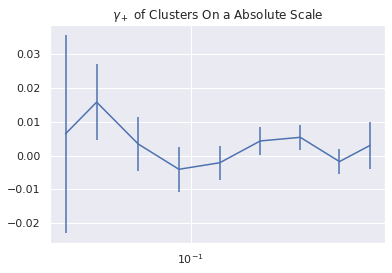

Aggregated xi:
[  0.      -0.6566  -7.0659  -2.6735   5.4048   5.0537 -14.6639 -24.1527
   8.3033  -3.7151]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -384.3091 -1521.4997 -2287.5676 -3235.3383 -4639.79
 -5060.969  -4579.4731 -2610.3343  -259.2619]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.  102.  447.  784. 1325. 2363. 3397. 4483. 4635. 1251.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0064 -0.0158 -0.0034  0.0041  0.0021 -0.0043 -0.0054  0.0018
 -0.003 ]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7677 -3.4038 -2.9178 -2.4418 -1.9635 -1.4898 -1.0215 -0.5632
 -0.2072]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

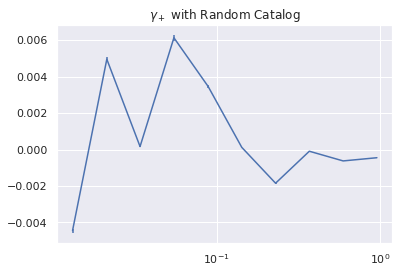

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1191e-04 -1.2480e-04 -4.1830e-06 -1.5443e-04 -8.7219e-05 -3.0522e-06
  4.6474e-05  2.3124e-06  1.5695e-05  1.1269e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

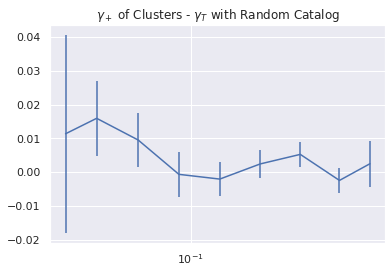

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

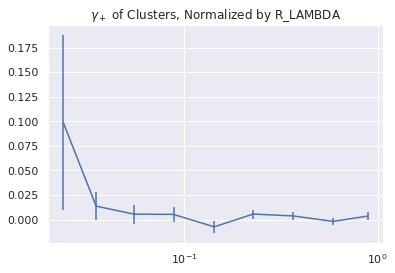

Aggregated xi:
[  0.      -1.0869  -4.0496  -3.3119  -5.355   13.1622 -16.3923 -14.9993
   9.1452 -11.2782]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.       -41.1511  -991.6096 -1736.7538 -2466.0907 -3465.8815
 -4312.0588 -4078.0845 -2612.4907  -381.2003]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   11.  296.  599. 1015. 1782. 2911. 4063. 4922. 3188.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0988 -0.0137 -0.0055 -0.0053  0.0074 -0.0056 -0.0037  0.0019
 -0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.741  -3.35   -2.8994 -2.4296 -1.9449 -1.4813 -1.0037 -0.5308
 -0.1196]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)